In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
# import data 
iris = pd.read_csv("iris_dataset.csv")
X = iris.iloc[:, 0:2].values  # we only take the first two features.
Y = iris.iloc[:,4].values

Text(3.8, 4.5, 'setosa')

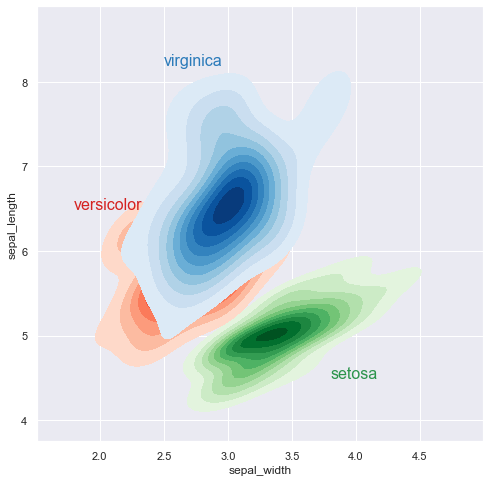

In [3]:
sns.set(style='darkgrid')
setosa = iris.query("flower=='Iris-setosa'")
versicolor = iris.query("flower=='Iris-versicolor'")
virginica = iris.query("flower=='Iris-virginica'")
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length, cmap="Greens",
          shade=True, shade_lowest=False)
ax = sns.kdeplot(versicolor.sepal_width, versicolor.sepal_length, cmap="Reds",
          shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length, cmap="Blues",
          shade=True, shade_lowest=False)

red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
green = sns.color_palette("Greens")[-2]
ax.text(2.5, 8.2, "virginica", size=16, color=blue)
ax.text(1.8, 6.5, "versicolor", size=16, color=red)
ax.text(3.8, 4.5, "setosa", size=16, color=green)

Text(0.4, 1, 'setosa')

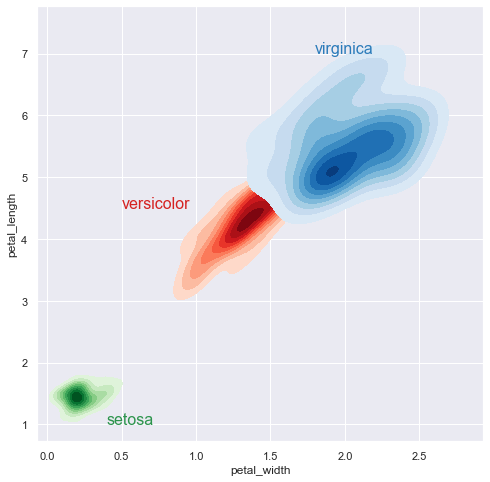

In [4]:
sns.set(style='darkgrid')
setosa = iris.query("flower=='Iris-setosa'")
versicolor = iris.query("flower=='Iris-versicolor'")
virginica = iris.query("flower=='Iris-virginica'")
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.kdeplot(setosa.petal_width, setosa.petal_length, cmap="Greens",
          shade=True, shade_lowest=False)
ax = sns.kdeplot(versicolor.petal_width, versicolor.petal_length, cmap="Reds",
          shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.petal_width, virginica.petal_length, cmap="Blues",
          shade=True, shade_lowest=False)

red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
green = sns.color_palette("Greens")[-2]
ax.text(1.8, 7, "virginica", size=16, color=blue)
ax.text(0.5, 4.5, "versicolor", size=16, color=red)
ax.text(0.4, 1, "setosa", size=16, color=green)

In [5]:
# Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

In [6]:
def plot_data(X,Y,clf):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()


In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

# 1. Logistic Regression

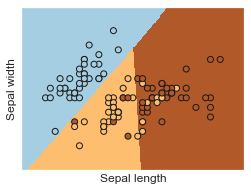

In [8]:
# Create an instance of Logistic Regression Classifier and fit the data.
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
logreg.fit(X_train, Y_train)
plot_data(X_train,Y_train,logreg)
log_pred=logreg.predict(X_test)

# 2. Decision Tree Classifier

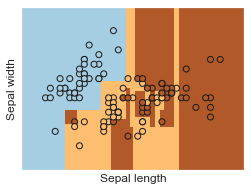

In [9]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTclassifier.fit(X_train, Y_train)
plot_data(X_train,Y_train,DTclassifier)
DT_pred=DTclassifier.predict(X_test)

# 3. Random Forest Classifier

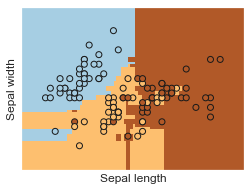

In [10]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
plot_data(X_train,Y_train,classifier)
pred=classifier.predict(X_test)

# 4. K Neighbors Classifier

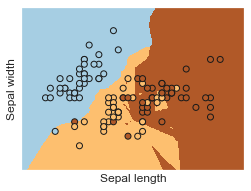

In [11]:
from sklearn.neighbors import KNeighborsClassifier
KNNclassifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNNclassifier.fit(X_train, Y_train)
plot_data(X_train,Y_train,KNNclassifier)
KNNpred=KNNclassifier.predict(X_test)

# 5. Naive Bayes Algorithm

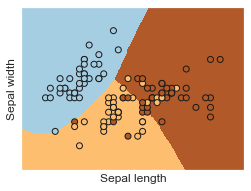

In [12]:
from sklearn.naive_bayes import GaussianNB
NBclassifier = GaussianNB()
NBclassifier.fit(X_train, Y_train)
plot_data(X_train,Y_train,NBclassifier)
NBpred=NBclassifier.predict(X_test)

# 6. Support Vector Machine Algorithm

c:\users\parakh gupta\python3.6\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


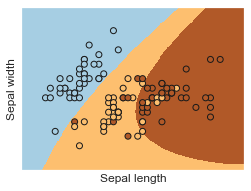

In [13]:
from sklearn.svm import SVC
SVCclassifier = SVC(kernel = 'poly', random_state = 0)
SVCclassifier.fit(X_train, Y_train)
plot_data(X_train,Y_train,SVCclassifier)
SVCpred=SVCclassifier.predict(X_test)

# Performance Comparison

In [14]:
from sklearn.metrics import accuracy_score
Model=['Logistic Regression','Decision Tree Classifier', ' Random Forest Classifier',
       'K Neighbors Classifier', 'Naive Bayes Algorithm', 'Support Vector Machine']
Model_pred=[log_pred, DT_pred, pred, KNNpred, NBpred, SVCpred]
accuracy=[]
for i in Model_pred:
    accuracy.append(accuracy_score(Y_test, i)*100)
df = pd.DataFrame(Model)
df.columns=['Model']
df['Accuracy']=accuracy
df

,Model,Accuracy
0,Logistic Regression,76.315789
1,Decision Tree Classifier,63.157895
2,Random Forest Classifier,65.789474
3,K Neighbors Classifier,76.315789
4,Naive Bayes Algorithm,76.315789
5,Support Vector Machine,73.684211


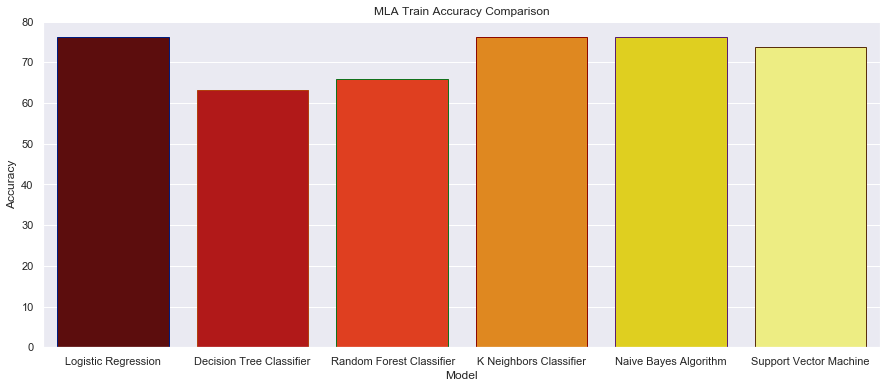

In [15]:
plt.subplots(figsize=(15,6))
sns.barplot(x="Model", y="Accuracy",data=df,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.title('MLA Train Accuracy Comparison')
plt.show()

In [16]:
id=df["Accuracy"].idxmax()
df.iloc[0]

Model       Logistic Regression
Accuracy                76.3158
Name: 0, dtype: object